In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_json('patch_db.json')
df

,CVE_ID,CWE_ID,category,commit_id,commit_message,diff_code,owner,repo,source
0,NA,NA,non-security,540958e2f5a87b81aa5f55ce40b3e2869754f97d,commit 540958e2f5a87b81aa5f55ce40b3e2869754f97...,diff --git a/drivers/staging/comedi/drivers/cb...,stoth68000,media-tree,wild
1,NA,NA,non-security,64d240b721b21e266ffde645ec965c3b6d1c551f,commit 64d240b721b21e266ffde645ec965c3b6d1c551...,diff --git a/drivers/target/target_core_file.c...,stoth68000,media-tree,wild
2,NA,NA,non-security,f181dd278274f50e689ebd13237010a90b430164,commit f181dd278274f50e689ebd13237010a90b43016...,diff --git a/include/paths.h b/include/paths.h...,openbsd,src,wild
3,NA,NA,non-security,0abdc3723b5d33dde698ab941325edec2819c128,commit 0abdc3723b5d33dde698ab941325edec2819c12...,diff --git a/gnu/usr.bin/binutils/ld/lexsup.c ...,openbsd,src,wild
4,NA,NA,non-security,d7930d7f820e5dd6b07b823f155aeb943b525e16,commit d7930d7f820e5dd6b07b823f155aeb943b525e1...,diff --git a/src/expat_erl.c b/src/expat_erl.c...,esl,MongooseIM,wild
...,...,...,...,...,...,...,...,...,...
35810,CVE-2013-0217,399,security,7d5145d8eb2b9791533ffe4dc003b129b9696c48,From 7d5145d8eb2b9791533ffe4dc003b129b9696c48 ...,diff --git a/drivers/net/xen-netback/netback.c...,torvalds,linux,cve
35811,CVE-2018-18311,119,security,34716e2a6ee2af96078d62b065b7785c001194be,From 34716e2a6ee2af96078d62b065b7785c001194be ...,diff --git a/util.c b/util.c\nindex 7282dd9cfe...,Perl,perl5,cve
35812,CVE-2019-12984,476,security,385097a3675749cbc9e97c085c0e5dfe4269ca51,From 385097a3675749cbc9e97c085c0e5dfe4269ca51 ...,diff --git a/net/nfc/netlink.c b/net/nfc/netli...,torvalds,linux,cve
35813,CVE-2013-0865,119,security,f3d16706060ab6ae6dc78f15359fab3fd87c9495,From f3d16706060ab6ae6dc78f15359fab3fd87c9495 ...,diff --git a/libavcodec/vqavideo.c b/libavcode...,NA,NA,cve


In [9]:
value_numbers =  df['commit_message'].value_counts()
value_numbers

In [6]:

# 过滤出现次数大于 1 的值
greater_than_one = value_numbers[value_numbers > 1]

# 输出出现次数大于 1 的值的数量
count_greater_than_one = len(greater_than_one)

In [23]:
greater_than_1_percentage = count_greater_than_one / len(df)  

In [24]:
# 大约4%

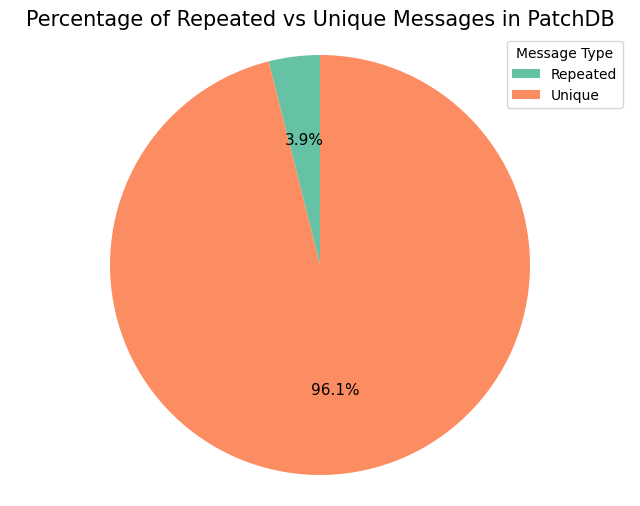

In [49]:
import seaborn as sns
# 准备绘制饼图的数据
labels = ['Repeated', 'Unique']  # 精简的标签
sizes = [greater_than_1_percentage, 1-greater_than_1_percentage]

# colors = ['red', 'green']

# 绘制饼图
plt.figure(figsize=(8, 6))
plt.pie(sizes, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'), textprops={'fontsize': 11})

# 确保饼图为圆形
plt.axis('equal')

# 添加图例
plt.legend(labels, title="Message Type", loc="upper right")

# 确保饼图为圆形
plt.axis('equal')

# 添加标题
plt.title('Percentage of Repeated vs Unique Messages in PatchDB',fontsize = 15)

# 展示图表
plt.show()